In [201]:
import pandas
import numpy as np
import matplotlib.pyplot as plt

In [202]:
train_set = pandas.read_csv("train.csv")

In [203]:
train_set

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


0

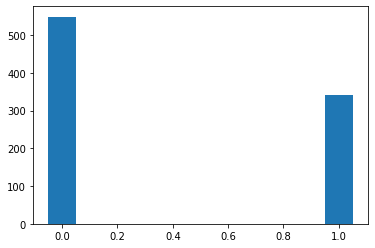

In [204]:
plt.hist(train_set["Survived"],bins=[0,1,1,2],align = "left",rwidth=0.1)
sum(train_set["Survived"].isnull())

0

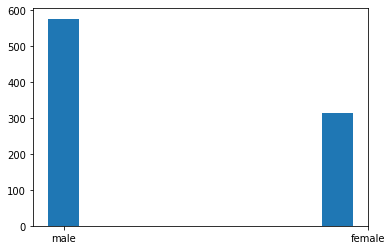

In [205]:
plt.hist(train_set["Sex"],align = "left")
sum(train_set["Sex"].isnull())

/home/nicholasw/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/home/nicholasw/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


177

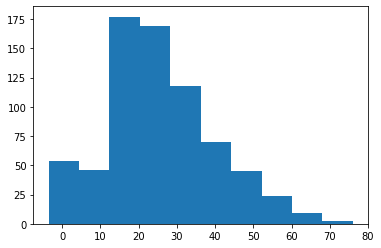

In [206]:
plt.hist(train_set["Age"],align = "left")
sum(train_set["Age"].isnull())

0

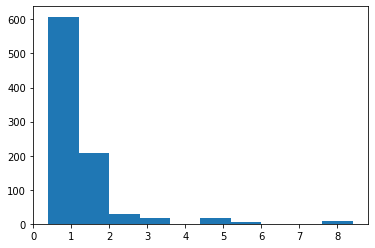

In [207]:
plt.hist(train_set["SibSp"],align = "right")
sum(train_set["SibSp"].isnull())

0

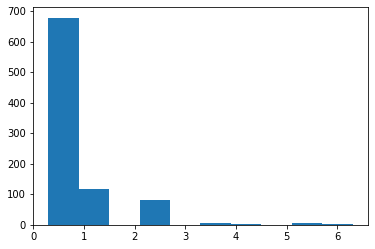

In [208]:
plt.hist(train_set["Parch"],align = "right")
sum(train_set["Parch"].isnull())

0

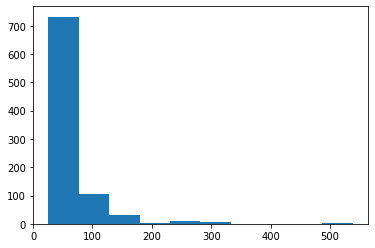

In [209]:
plt.hist(train_set["Fare"],align = "right")
sum(train_set["Fare"].isnull())

In [210]:
print(train_set["Embarked"].head())
print(sum(train_set["Embarked"].isnull()))
print(sum(train_set["Embarked"]== 'S'))
print(sum(train_set["Embarked"]== 'Q'))
print(sum(train_set["Embarked"]== 'C'))

0    S
1    C
2    S
3    S
4    S
Name: Embarked, dtype: object
2
644
77
168


In [211]:
print(sum(train_set["Pclass"].isnull()))

0


Approach:
Use classification tree to predict survival  
1) try to fill missing values - fill missing age based on mean age by gender, sibsp, other classifiers..?  
    - multiple regression model?
2) test models with confusion matrix

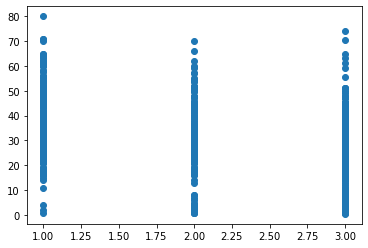

In [212]:
plt.scatter(train_set["Pclass"],train_set["Age"])

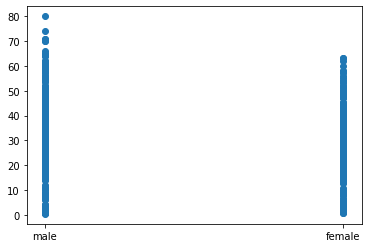

In [213]:
plt.scatter(train_set["Sex"],train_set["Age"])

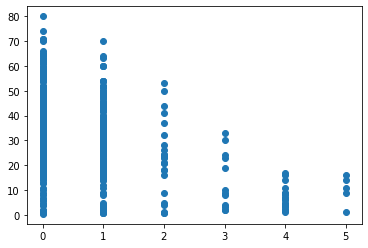

In [214]:
plt.scatter(train_set["SibSp"],train_set["Age"])

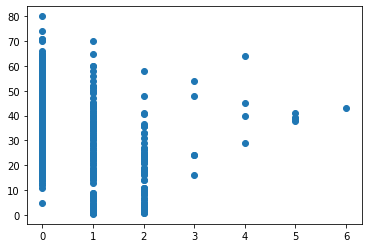

In [215]:
plt.scatter(train_set["Parch"],train_set["Age"])

(array([ 8.,  7., 18., 31., 22., 15., 11., 10.,  5.,  3.]),
 array([ 0.42 ,  7.478, 14.536, 21.594, 28.652, 35.71 , 42.768, 49.826,
        56.884, 63.942, 71.   ]),
 <a list of 10 Patch objects>)

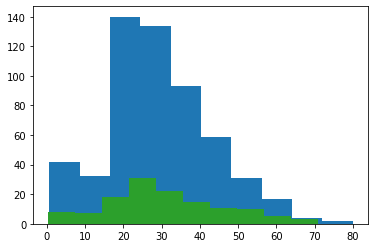

In [216]:
plt.hist(train_set[train_set["Embarked"] == 'S']['Age'])
plt.hist(train_set[train_set["Embarked"] == 'Q']['Age'])
plt.hist(train_set[train_set["Embarked"] == 'C']['Age'])

Imputation strategy:
- Use Sex, SibSp, and Parch to estimate age.
- Replace missing Embarked values with the mode.

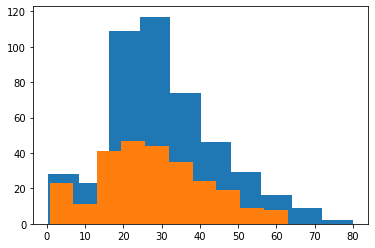

In [217]:
# mean male age
plt.hist(train_set[train_set["Sex"] == 'male']['Age'])
mean_male = train_set[train_set["Sex"] == 'male']['Age'].mean()
n_male = train_set[train_set["Sex"] == 'male']['Age'].count()
# mean female age
plt.hist(train_set[train_set["Sex"] == 'female']['Age'])
mean_female = train_set[train_set["Sex"] == 'female']['Age'].mean()
n_female = train_set[train_set["Sex"] == 'female']['Age'].count()

In [218]:
# mean ages of sibsp
sibsp_means_and_n = {}

for i in range(0,6):
    mean = train_set[train_set["SibSp"] == i]['Age'].mean()
    sample_size = train_set[train_set["SibSp"] == i]['Age'].count()
    sibsp_means_and_n[i] = [mean,sample_size]
    
    
print(sibsp_means_and_n)

{0: [31.39755838641189, 471], 1: [30.089726775956283, 183], 2: [22.62, 25], 3: [13.916666666666666, 12], 4: [7.055555555555555, 18], 5: [10.2, 5]}


In [219]:
# mean male age
train_set[train_set["Parch"] == 0]['Age'].mean()
# mean ages of sibsp
parch_means_and_n = {}

for i in range(0,7):
    mean = train_set[train_set["Parch"] == i]['Age'].mean()
    sample_size = train_set[train_set["Parch"] == i]['Age'].count()
    parch_means_and_n[i] = [mean,sample_size]
    
    
print(parch_means_and_n)

{0: [32.17850287907869, 521], 1: [24.422, 110], 2: [17.216911764705884, 68], 3: [33.2, 5], 4: [44.5, 4], 5: [39.2, 5], 6: [43.0, 1]}


In [220]:
null_ages = train_set[train_set["Age"].isnull()]

In [221]:
male_ages_estimated = []
for index, row in null_ages[null_ages['Sex']=='male'].iterrows():
    thisrow_sex = null_ages.loc[index]["Sex"]
    thisrow_sibsp = null_ages.loc[index]["SibSp"]
    thisrow_parch = null_ages.loc[index]["Parch"]
    
    if (thisrow_sibsp > 5):
        thisrow_sibsp = 5
    if (thisrow_parch > 6):
        thisrow_parch = 6
    
    total_n = n_male + sibsp_means_and_n[thisrow_sibsp][1] + parch_means_and_n[thisrow_parch][1]
    
    age_estimate = mean_male*(n_male/total_n) + \
    sibsp_means_and_n[thisrow_sibsp][0]*(sibsp_means_and_n[thisrow_sibsp][1] / total_n) + \
    parch_means_and_n[thisrow_parch][0]*(parch_means_and_n[thisrow_parch][1] / total_n)
    
    male_ages_estimated.append(age_estimate)

null_ages.loc[null_ages['Sex']=='male','Age'] = male_ages_estimated
null_ages.head()

/home/nicholasw/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:965: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
5,6,0,3,"Moran, Mr. James",male,31.468803,0,0,330877,8.4583,NaN,Q
17,18,1,2,"Williams, Mr. Charles Eugene",male,31.468803,0,0,244373,13.0000,NaN,S
19,20,1,3,"Masselmani, Mrs. Fatima",female,NaN,0,0,2649,7.2250,NaN,C
26,27,0,3,"Emir, Mr. Farred Chehab",male,31.468803,0,0,2631,7.2250,NaN,C
28,29,1,3,"O'Dwyer, Miss. Ellen ""Nellie""",female,NaN,0,0,330959,7.8792,NaN,Q


In [222]:
null_ages[null_ages["Sex"]=='female'].count()

PassengerId    53
Survived       53
Pclass         53
Name           53
Sex            53
Age             0
SibSp          53
Parch          53
Ticket         53
Fare           53
Cabin           7
Embarked       53
dtype: int64

In [223]:
female_ages_estimated = []
for index, row in null_ages[null_ages['Sex']=='female'].iterrows():
    thisrow_sex = null_ages.loc[index]["Sex"]
    thisrow_sibsp = null_ages.loc[index]["SibSp"]
    thisrow_parch = null_ages.loc[index]["Parch"]
    
    if (thisrow_sibsp > 5):
        thisrow_sibsp = 5
    if (thisrow_parch > 6):
        thisrow_parch = 6
    
    total_n = n_female + sibsp_means_and_n[thisrow_sibsp][1] + parch_means_and_n[thisrow_parch][1]
    
    age_estimate = mean_female*(n_male/total_n) + \
    sibsp_means_and_n[thisrow_sibsp][0]*(sibsp_means_and_n[thisrow_sibsp][1] / total_n) + \
    parch_means_and_n[thisrow_parch][0]*(parch_means_and_n[thisrow_parch][1]/total_n)
    
    female_ages_estimated.append(age_estimate)
    
null_ages.loc[null_ages['Sex']=='female','Age'] = female_ages_estimated

/home/nicholasw/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:965: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


In [224]:
null_ages.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
5,6,0,3,"Moran, Mr. James",male,31.468803,0,0,330877,8.4583,NaN,Q
17,18,1,2,"Williams, Mr. Charles Eugene",male,31.468803,0,0,244373,13.0000,NaN,S
19,20,1,3,"Masselmani, Mrs. Fatima",female,35.274594,0,0,2649,7.2250,NaN,C
26,27,0,3,"Emir, Mr. Farred Chehab",male,31.468803,0,0,2631,7.2250,NaN,C
28,29,1,3,"O'Dwyer, Miss. Ellen ""Nellie""",female,35.274594,0,0,330959,7.8792,NaN,Q


In [225]:
train_set.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [226]:
train_set.loc[null_ages.PassengerId-1] = null_ages

In [227]:
train_set.loc[null_ages.PassengerId-1]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
5,6,0,3,"Moran, Mr. James",male,31.468803,0,0,330877,8.4583,NaN,Q
17,18,1,2,"Williams, Mr. Charles Eugene",male,31.468803,0,0,244373,13.0000,NaN,S
19,20,1,3,"Masselmani, Mrs. Fatima",female,35.274594,0,0,2649,7.2250,NaN,C
26,27,0,3,"Emir, Mr. Farred Chehab",male,31.468803,0,0,2631,7.2250,NaN,C
28,29,1,3,"O'Dwyer, Miss. Ellen ""Nellie""",female,35.274594,0,0,330959,7.8792,NaN,Q
...,...,...,...,...,...,...,...,...,...,...,...,...
859,860,0,3,"Razi, Mr. Raihed",male,31.468803,0,0,2629,7.2292,NaN,C
863,864,0,3,"Sage, Miss. Dorothy Edith ""Dolly""",female,41.519659,8,2,CA. 2343,69.5500,NaN,S
868,869,0,3,"van Melkebeke, Mr. Philemon",male,31.468803,0,0,345777,9.5000,NaN,S
878,879,0,3,"Laleff, Mr. Kristo",male,31.468803,0,0,349217,7.8958,NaN,S


In [228]:
#fill missing embarked
train_set["Embarked"].fillna(train_set["Embarked"].mode())

0      S
1      C
2      S
3      S
4      S
      ..
886    S
887    S
888    S
889    C
890    Q
Name: Embarked, Length: 891, dtype: object

In [229]:
# re encode male/female
pandas.get_dummies(train_set['Sex'])

,female,male
0,0,1
1,1,0
2,1,0
3,1,0
4,0,1
...,...,...
886,0,1
887,1,0
888,1,0
889,0,1


In [230]:
# try predicting
predictors = train_set[['Pclass','Age','SibSp','Parch','Fare']].join(pandas.get_dummies(train_set['Sex']))
predictors = predictors.join(pandas.get_dummies(train_set['Embarked']))
target = train_set['Survived']
predictors.head()

,Pclass,Age,SibSp,Parch,Fare,female,male,C,Q,S
0,3,22.0,1,0,7.2500,0,1,0,0,1
1,1,38.0,1,0,71.2833,1,0,1,0,0
2,3,26.0,0,0,7.9250,1,0,0,0,1
3,1,35.0,1,0,53.1000,1,0,0,0,1
4,3,35.0,0,0,8.0500,0,1,0,0,1


In [231]:
# import decision trees scikit-learn libraries
%matplotlib inline
from sklearn import tree
from sklearn.metrics import accuracy_score, confusion_matrix
import matplotlib.pyplot as plt
import graphviz

from sklearn.tree import export_graphviz

import itertools

In [232]:
mytree = tree.DecisionTreeClassifier(max_depth=5)
mytree.fit(predictors,target)

print("Decision tree model saved to tree!")

Decision tree model saved to tree!


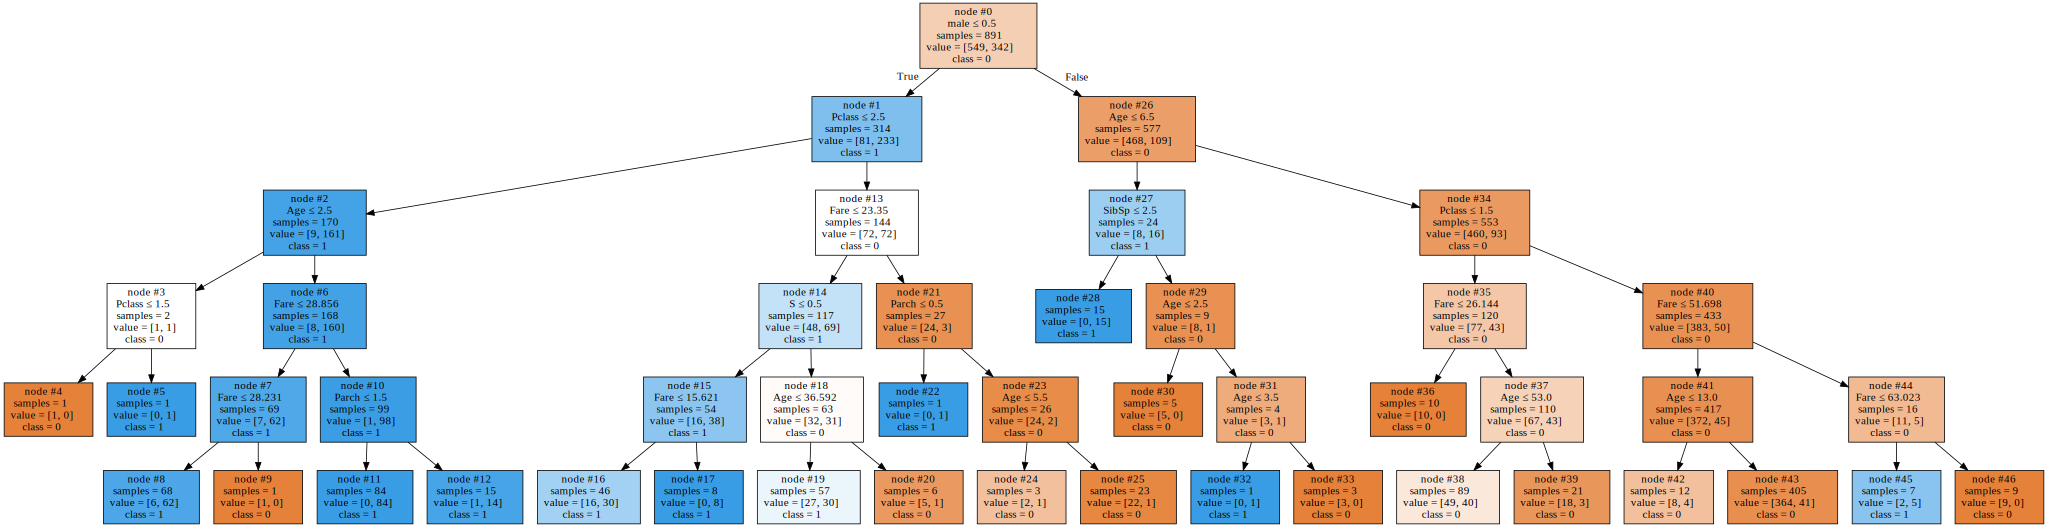

In [233]:
export_graphviz(mytree,
                feature_names=list(predictors.columns.values),
                out_file="tree",
                class_names=["0","1"],
                filled=True,
                node_ids=True,
                special_characters=True,
                impurity=False,
                label="all",
                leaves_parallel=False)
with open("/home/nicholasw/ComputingEnvironments/python-workspace/titanic/tree") as tree_image:
                tree_graph = tree_image.read()
graphviz.Source(tree_graph)

In [234]:
test_set = pandas.read_csv("test.csv")

In [235]:
test_set

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [236]:
# need to clean the testing data set as well
mean_female = test_set[test_set['Sex'] == 'female'].loc[:,'Age'].mean()
mean_male = test_set[test_set['Sex'] == 'male'].loc[:,'Age'].mean()

test_set.loc[test_set['Sex'] == 'female','Age'] = test_set[test_set['Sex'] == 'female'].loc[:,'Age'].replace(np.nan,mean_female)

test_set.loc[test_set['Sex'] == 'male','Age'] = test_set[test_set['Sex'] == 'male'].loc[:,'Age'].replace(np.nan,mean_male)

test_set['Fare'] = test_set['Fare'].replace(np.nan, test_set['Fare'].mean())

In [237]:
test_set

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.500000,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.000000,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.000000,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.000000,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.000000,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,30.272732,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.000000,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.500000,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,30.272732,0,0,359309,8.0500,NaN,S


In [238]:
test_predictors = test_set[['Pclass','Age','SibSp','Parch','Fare']].join(pandas.get_dummies(test_set['Sex']))
test_predictors = test_predictors.join(pandas.get_dummies(test_set['Embarked']))
#test_predictors.isnull()

In [239]:
predictions = mytree.predict(test_predictors)

In [240]:
predictions_formatted = test_set[['PassengerId']].join([pandas.DataFrame(predictions,columns=["Survived"])])

In [241]:
predictions_formatted.to_csv("pred.csv",index=False)